In [ ]:
# import libraries (you may add additional imports but you may not have to)
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [ ]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/books/book-crossings.zip

!unzip book-crossings.zip

books_filename = 'BX-Books.csv'
ratings_filename = 'BX-Book-Ratings.csv'

--2023-08-18 06:46:42--  https://cdn.freecodecamp.org/project-data/books/book-crossings.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26085508 (25M) [application/zip]
Saving to: ‘book-crossings.zip’

book-crossings.zip  100%[===================>]  24.88M   114MB/s    in 0.2s    

2023-08-18 06:46:43 (114 MB/s) - ‘book-crossings.zip’ saved [26085508/26085508]

Archive:  book-crossings.zip
  inflating: BX-Book-Ratings.csv     
  inflating: BX-Books.csv            
  inflating: BX-Users.csv            


In [ ]:
# import csv data into dataframes
df_books = pd.read_csv(
    books_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'})

df_ratings = pd.read_csv(
    ratings_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'})

In [ ]:
df_books.describe()

,isbn,title,author
count,271379,271379,271378
unique,271379,242154,102042
top,0195153448,Selected Poems,Agatha Christie
freq,1,27,632


In [ ]:
df_ratings.describe()

,user,rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [ ]:
df_ratings.head()

,user,isbn,rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


In [ ]:
df_books.head()

,isbn,title,author
0,0195153448,Classical Mythology,Mark P. O. Morford
1,0002005018,Clara Callan,Richard Bruce Wright
2,0060973129,Decision in Normandy,Carlo D'Este
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata
4,0393045218,The Mummies of Urumchi,E. J. W. Barber


In [ ]:
df = pd.merge(df_ratings, df_books, on='isbn')

In [ ]:
df.head()

,user,isbn,rating,title,author
0,276725,034545104X,0.0,Flesh Tones: A Novel,M. J. Rose
1,2313,034545104X,5.0,Flesh Tones: A Novel,M. J. Rose
2,6543,034545104X,0.0,Flesh Tones: A Novel,M. J. Rose
3,8680,034545104X,5.0,Flesh Tones: A Novel,M. J. Rose
4,10314,034545104X,9.0,Flesh Tones: A Novel,M. J. Rose


In [ ]:
combine_book_rating = df.dropna(axis=0, subset=['title'])

In [ ]:
book_ratingCount = (combine_book_rating.
  groupby(by=['title'])['rating']
  .count()
  .reset_index()
  .rename(columns={'rating': 'totalRatingCount'}))

In [ ]:
book_ratingCount.head()

,title,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [ ]:
ratings_with_totaRatingCount = combine_book_rating.merge(
    book_ratingCount,
    left_on='title',
    right_on='title',
    how='left'
)

In [ ]:
ratings_with_totaRatingCount.head()

,user,isbn,rating,title,author,totalRatingCount
0,276725,034545104X,0.0,Flesh Tones: A Novel,M. J. Rose,60
1,2313,034545104X,5.0,Flesh Tones: A Novel,M. J. Rose,60
2,6543,034545104X,0.0,Flesh Tones: A Novel,M. J. Rose,60
3,8680,034545104X,5.0,Flesh Tones: A Novel,M. J. Rose,60
4,10314,034545104X,9.0,Flesh Tones: A Novel,M. J. Rose,60


In [ ]:
 ratings_with_totaRatingCount['totalRatingCount'].describe()

count    1.031175e+06
mean     6.977912e+01
std      1.753352e+02
min      1.000000e+00
25%      3.000000e+00
50%      1.300000e+01
75%      6.100000e+01
max      2.502000e+03
Name: totalRatingCount, dtype: float64

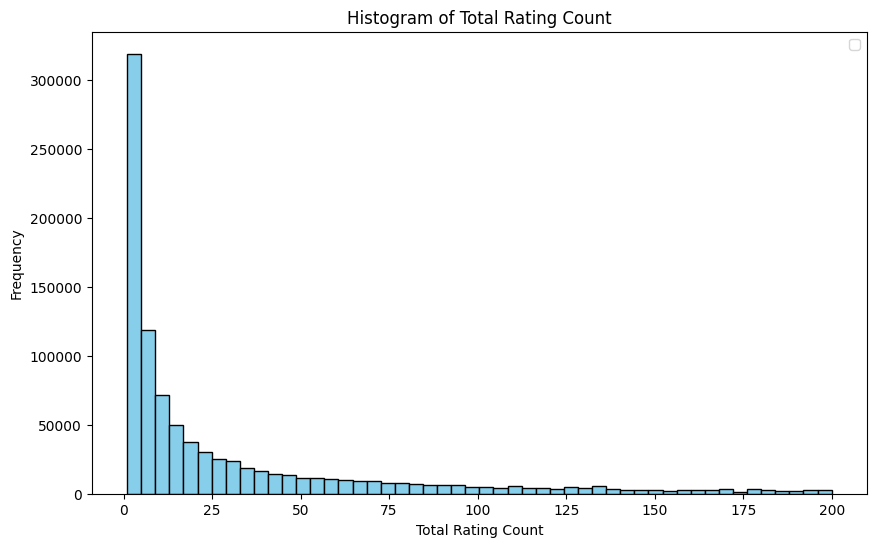

In [ ]:
import matplotlib.pyplot as plt

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(
    ratings_with_totaRatingCount['totalRatingCount'],
    bins=50,
    color='skyblue',
    edgecolor='black',
    range=(1, 200),
)

# Add labels and title
plt.title('Histogram of Total Rating Count')
plt.xlabel('Total Rating Count')
plt.ylabel('Frequency')

# Add legend
plt.legend()

# Show plot
plt.show()

In [ ]:
rating_popular_book = ratings_with_totaRatingCount.query(
    'totalRatingCount >= 25'
)
rating_popular_book.describe()

,user,rating,totalRatingCount
count,403993.000000,403993.000000,403993.000000
mean,139686.319857,2.996787,167.628189
std,80424.438526,3.924788,250.334963
min,8.000000,0.000000,25.000000
25%,69697.000000,0.000000,45.000000
50%,138844.000000,0.000000,88.000000
75%,210717.000000,7.000000,196.000000
max,278854.000000,10.000000,2502.000000


In [ ]:
book_features_df = rating_popular_book.pivot(
    index='isbn',
    columns='user',
    values='rating'
).fillna(0)

In [ ]:
book_features_df.head()

user,8,9,10,14,16,17,19,23,26,32,...,278832,278836,278838,278843,278844,278846,278849,278851,278852,278854
isbn,,,,,,,,,,,,,,,,,,,,,
0001047647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0001047973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0001382608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0002220776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0002242591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
book_features_df.shape

(14186, 57128)

In [ ]:
from scipy.sparse import csr_matrix

book_features_df_matrix = csr_matrix(book_features_df.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(book_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
df_books.loc[
    df_books['title'] == 'The Queen of the Damned (Vampire Chronicles (Paperback))',
    'isbn'
].iloc[0]

'0345351525'

In [ ]:
desired_isbn = '0345351525'
row_number = book_features_df.index.get_loc(desired_isbn)
print(row_number)

2325


In [ ]:
distances, indeces = model_knn.kneighbors(
    book_features_df.iloc[2325,:].values.reshape(1,-1),
    n_neighbors=10
)

In [ ]:
print([indece for indece in indeces[0]])

[2325, 2439, 2211, 2287, 2516, 2575, 2485, 10035, 2269, 10487]


In [ ]:
desired_isbn = '0345351525'
row_number = book_features_df.index.get_loc(desired_isbn)
print(row_number)

# Step 1: Get ISBNs for the specified row numbers
row_numbers = [2439, 2211, 2287, 2516, 2575, 2485, 10035, 2269, 10487]
isbns = [book_features_df.index[row_num] for row_num in row_numbers]

# Step 2: Search for titles using ISBNs in df_books DataFrame
titles = df_books.loc[df_books['isbn'].isin(isbns), 'title']

# Print the titles
for isbn, title in zip(isbns, titles):
    print(f"ISBN: {isbn}, Title: {title}")

2325
ISBN: 034538475X, Title: The Vampire Lestat (Vampire Chronicles, Book II)
ISBN: 0345313860, Title: Pandora: New Tales of the Vampires (New Tales of the Vampires)
ISBN: 0345337662, Title: Interview with the Vampire
ISBN: 0345409671, Title: The Tale of the Body Thief (Vampire Chronicles (Paperback))
ISBN: 0345422384, Title: Feast of All Saints
ISBN: 0345397819, Title: Memnoch the Devil (Vampire Chronicles, No 5)
ISBN: 0671542036, Title: Memnoch the Devil : The Vampire Chronicles (Vampire Chronicles)
ISBN: 0345334531, Title: Lasher: Lives of the Mayfair Witches (Lives of the Mayfair Witches)
ISBN: 0679441018, Title: Halloween Party
